<a href="https://colab.research.google.com/github/valeriarpo/Business-Analytics/blob/main/5_M%C3%A9todosClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modelo KNN - Key Nearest Neighbor**
0. Carga de las librerias

In [ ]:
import pandas as pd                            #conexión con excel
import numpy as np                             #operaciones matemáticas
import matplotlib.pyplot as plt                #gráficos
import seaborn as sns                          #Para graficar distribuciónes

from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.metrics import confusion_matrix           #Matriz de confusión
from sklearn.cluster import KMeans                     #Montoncitos de datos






1. Se cargan los datos

<Figure size 1000x1000 with 0 Axes>

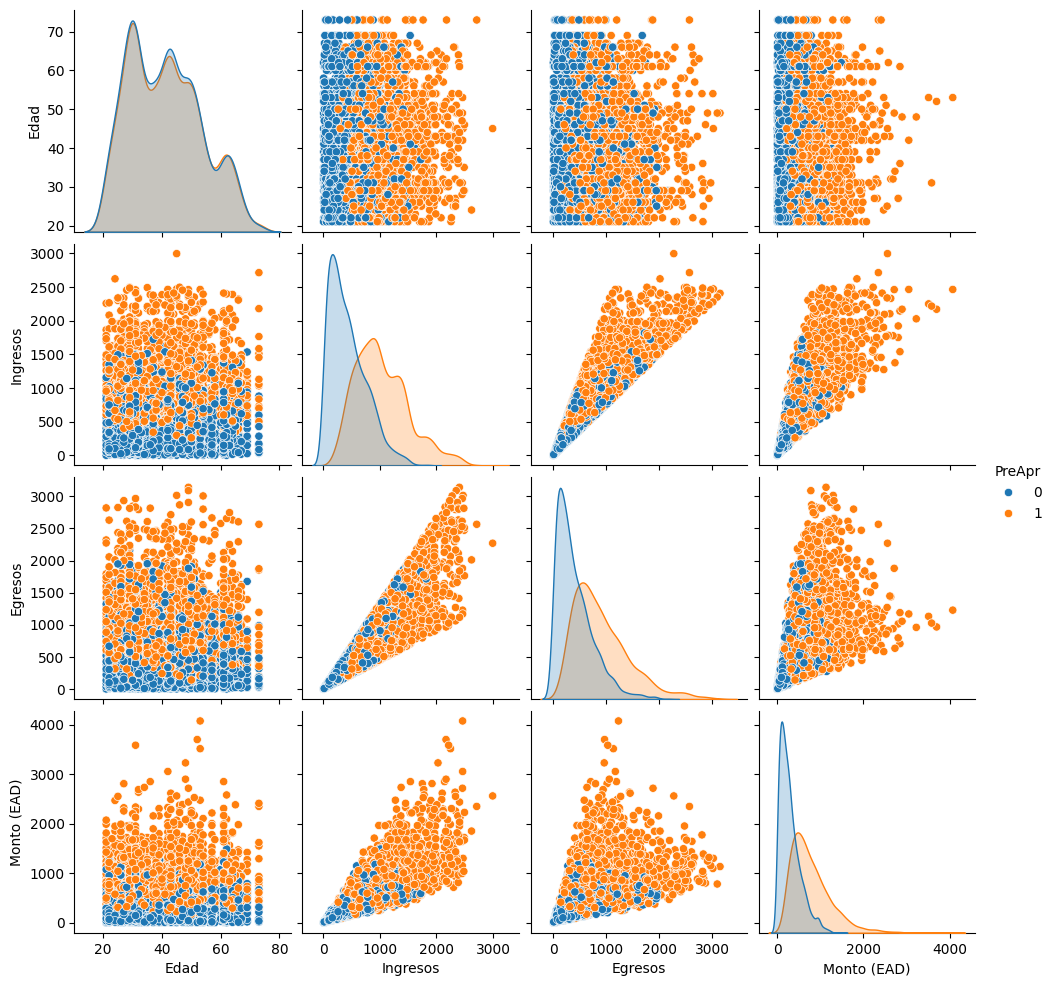

,Edad,Ingresos,Egresos,Monto (EAD),PreApr
Edad,1.000000,-0.003647,-0.008714,-0.002399,0.005044
Ingresos,-0.003647,1.000000,0.892740,0.816212,0.594411
Egresos,-0.008714,0.892740,1.000000,0.527164,0.490899
Monto (EAD),-0.002399,0.816212,0.527164,1.000000,0.553089
PreApr,0.005044,0.594411,0.490899,0.553089,1.000000


In [ ]:
nxl="/content/0. SolicitantesCrédito(USD) (4).xlsx"
XDB= pd.read_excel(nxl, sheet_name=1)                          # X data base
XDB=XDB.dropna()
XDB.head(5)

#1. Se selecciona las variables de interes
XDB=XDB[["Edad","Ingresos","Egresos","Monto (EAD)", "PreApr"]]

#2. Determinar la correlacion entre las variables y su impacto sobre la variable de salida

plt.figure(figsize=(10,10))
sns.pairplot(XDB, hue="PreApr")
plt.show()

#3. La correlación numérica es
XDB.corr()

2. Se procede con la implementación del modelo KNN


La matriz de confusion es:
: [[2437  522]
 [ 648 2235]]
La exactitud es: 0.7997261211913728
La sensibilidad es: 0.7752341311134235
La especificidad es: 0.8235890503548496
El paciente es: [1]


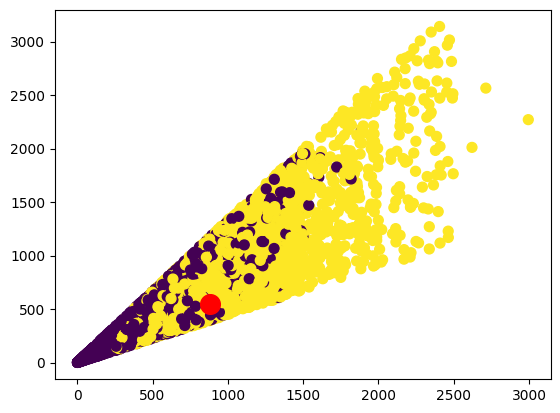

In [ ]:
#1. Construimos el modelo KNN
XD=np.array(XDB[["Edad","Ingresos","Egresos","Monto (EAD)"]])   #Variables de entrada
Yd=np.array(XDB["PreApr"])                                    #Variable de salida

Knn = KNeighborsClassifier(n_neighbors=10)                      #Evalua 10 vecinos
Knn.fit(XD,Yd)

ydp=Knn.predict(XD)

#2. Evaluamos el modelo KNN
cm=confusion_matrix(Yd,ydp)
print("La matriz de confusion es:\n:",cm)

VN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
VP=cm[1,1]

Exactitud = (VP+VN)/(VP+VN+FP+FN)
Exactitud
Sensibilidad = VP/(VP+FN)
Sensibilidad
Especificidad = VN/(VN+FP)
Especificidad

print("La exactitud es:",Exactitud)
print("La sensibilidad es:",Sensibilidad)
print("La especificidad es:",Especificidad)                        #Modelo funciona mejor negando creditos que aceptando, buena exactitud

#3. Evaluaos un paciente/pacienta
XDp=np.array([[26, 880, 550, 350]])                       #Donde se encuentra este paciente dentro de los datos
ydpp=Knn.predict(XDp)
print("El paciente es:",ydpp)

#Donde se encuentra el paciente
plt.figure()

plt.scatter(XD[:,1],XD[:,2],c=Yd,s=50,cmap="viridis")                              #Grafico de correlacion entre ing y egre > correl
plt.scatter(XDp[:,1],XDp[:,2],marker="o", s=200, facecolors="red")
plt.show()

**Modelo K-Means**

1. Se procede con la implementación del modelo


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


los centroides son los siguientes:
 [[  40.90441176 1930.5114329  2026.03599101 1140.80106045]
 [  41.07228916  236.55192554  207.18873039  170.96460534]
 [  40.81030928 1375.63224691  823.62006048 1499.46367136]
 [  40.96395469 1167.56457775 1226.93772674  655.30527084]
 [  41.13045611  700.94181927  594.22875091  529.66765171]]


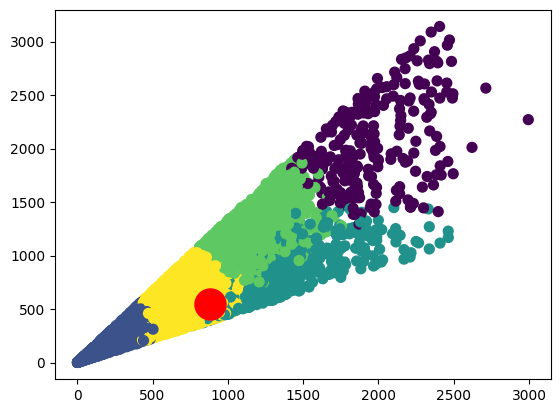

El paciente pertenece al grupo: [4]


In [ ]:
np.random.seed(42)             #Vamos a tomar las mismas semillas

#1. Construimos el modelo K-Means

k=5 #5 motoncitos de datos
mkm= KMeans(n_clusters=k)
mkm.fit(XD)

centroids=mkm.cluster_centers_
print("los centroides son los siguientes:\n", centroids)                       # 5 grupos de datos, contar filas
            #Valores de X = Ingresos , Valores de Y= Egresos

#Se trabaja con variables que tengan mayor correlación en este caso ingresos (XD,[,1]) y egresos (XD [,2])
#Tenemos que ubicar al paciente
plt.figure()
plt.scatter(XD[:,1],XD[:,2],c=mkm.labels_,s=50,cmap="viridis")
plt.scatter(XDp[:,1],XDp[:,2],marker="o", s=500, facecolors="red")
plt.show()

ydpkm=mkm.predict(XDp)
print("El paciente pertenece al grupo:",ydpkm)                               #Cae en fila 5 porque se cuenta desde 0


2. Se procede con la caracterización de cada cluster


*   Número de personas en cada cluster
*   Número de personas por cluster
*   Número de negados por cluster








In [ ]:
labels=mkm.labels_
print("los labels son:\n",labels)                       #Esto indica el lugar en donde cayo cada persona

counts_1=np.bincount(labels)
print("los counts son:\n",counts_1)                    #Aparece en orden cantidad de personas en cada categoría

c01=len(np.where((labels==0) & (Yd==1))[0])                         #Digame los preaprob dentro del primer cluster
c00=len(np.where((labels==0) & (Yd==0))[0])                         #Digame los preneg dentro del primer cluster

print("Las personas del primer cluster aprobadas son:", c01/(c00+c01))
print("Las personas del primer cluster negadas son:", c00/(c00+c01))

c31=len(np.where((labels==3) & (Yd==1))[0])                         #Digame los preaprob dentro del 3 cluster
c30=len(np.where((labels==3) & (Yd==0))[0])                         #Digame los preneg dentro del 3 cluster


c41=len(np.where((labels==4) & (Yd==1))[0])                         #Digame los preaprob dentro del 3 cluster
c40=len(np.where((labels==4) & (Yd==0))[0])                         #Digame los preneg dentro del 3 cluster

print("Las personas del primer cluster aprobadas son:", c01/(c00+c01))
print("Las personas del primer cluster negadas son:", c00/(c00+c01))




los labels son:
 [3 1 4 ... 4 4 3]
los counts son:
 [ 272 2075  485  971 2039]
Las personas del primer cluster aprobadas son: 0.9595588235294118
Las personas del primer cluster negadas son: 0.04044117647058824
Las personas del primer cluster aprobadas son: 0.9595588235294118
Las personas del primer cluster negadas son: 0.04044117647058824
